In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('media prediction and its cost.csv')
data

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [5]:
data.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [9]:
data.nunique()

food_category                   45
food_department                 22
food_family                      3
store_sales(in millions)      1033
store_cost(in millions)       9919
unit_sales(in millions)          6
promotion_name                  49
sales_country                    3
marital_status                   2
gender                           2
total_children                   6
education                        5
member_card                      4
occupation                       5
houseowner                       2
avg_cars_at home(approx)         5
avg. yearly_income               8
num_children_at_home             6
avg_cars_at home(approx).1       5
brand_name                     111
SRP                            315
gross_weight                   376
net_weight                     332
recyclable_package               2
low_fat                          2
units_per_case                  36
store_type                       5
store_city                      19
store_state         

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
data_obj = data.select_dtypes('object')
data_obj.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data['food_category'] = le.fit_transform(data['food_category'])



In [19]:
data['food_department'] = le.fit_transform(data['food_department'])
data['food_family'] = le.fit_transform(data['food_family'])
data['promotion_name'] = le.fit_transform(data['promotion_name'])
data['sales_country'] = le.fit_transform(data['sales_country'])
data['marital_status'] = le.fit_transform(data['marital_status'])
data['gender'] = le.fit_transform(data['gender'])
data['education'] = le.fit_transform(data['education'])
data['member_card'] = le.fit_transform(data['member_card'])
data['occupation'] = le.fit_transform(data['occupation'])
data['houseowner'] = le.fit_transform(data['houseowner'])
data['avg. yearly_income'] = le.fit_transform(data['avg. yearly_income'])
data['brand_name'] = le.fit_transform(data['brand_name'])
data['store_type'] = le.fit_transform(data['store_type'])
data['store_city'] = le.fit_transform(data['store_city'])
data['store_state'] = le.fit_transform(data['store_state'])
data['media_type'] = le.fit_transform(data['media_type'])

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<Axes: >

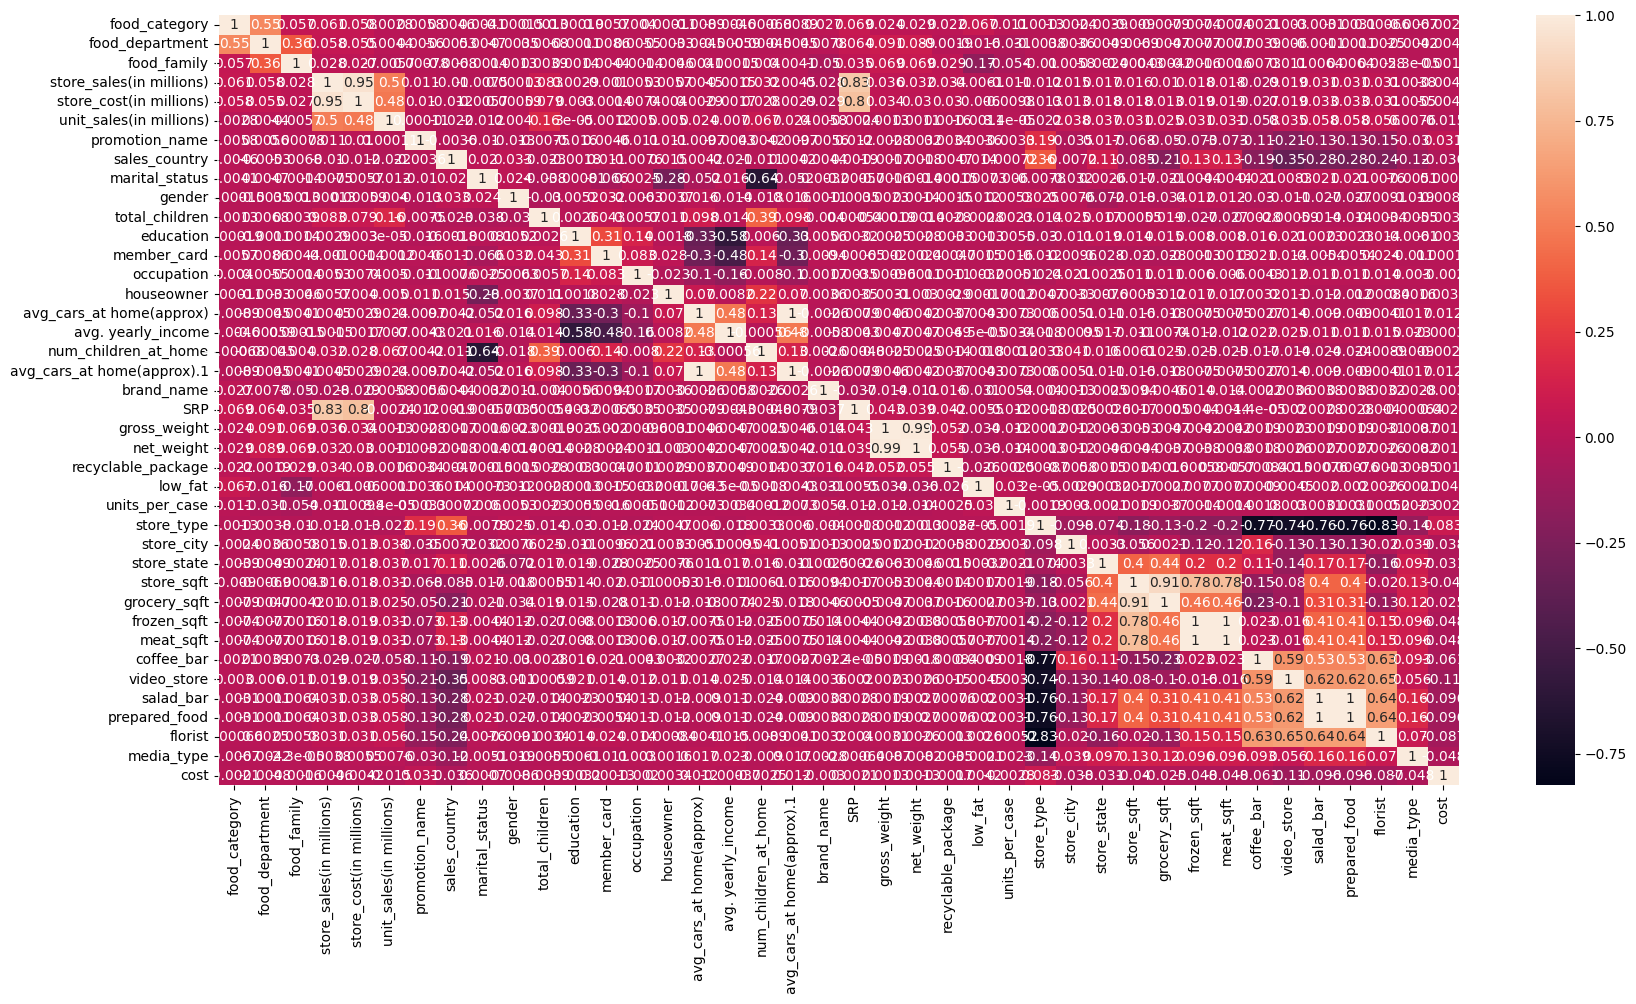

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

In [28]:
X = data.drop(['cost'], axis=1)
y = data.cost

In [39]:
rfe = RFE(RandomForestRegressor(n_estimators=100), n_features_to_select=12)

In [ ]:
rfe.fit(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
rfe.n_features_

In [ ]:
rfe.ranking_

In [ ]:
rfe.get_support()

In [ ]:
features_selected = X.columns[rfe.get_support()]
features_selected

In [ ]:
X_train1 = rfe.transform(X_train)
X_test1 = rfe.transform(X_test)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
model.fit(X_train1, y_train)

In [ ]:
y_pred1 = model.predict(X_test1)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred1)

In [ ]:
mean_absolute_error(y_test, y_pred1)

In [ ]:
r2_score(y_test, y_pred1)